### 키워드를 통한 시각화
 1. 꺾은선 그래프 : 35대~38대 총 4대에 걸쳐 중첩된 단어들의 빈도수 변화 비교
 2. 막대그래프 : 35대와 38대를 통한 빈도수 변화 비교
 3. 히트맵 : 35대와 38대의 각 단어들의 빈도수, 변화율을 확인
 4. (+)꺾은선 그래프+막대그래프 : 35대-38대 단어 빈도수 변화(bar) 및 변화율 확인(line-marker)

## 35대~38대 Keyword 교집합 및 빈도수 변화율 구하기

In [1]:
import pandas as pd

In [2]:
# 각 세대별 단어+빈도수 리스트 불러오기
s_35_mayor_df = pd.read_excel('result_35.xlsx', encoding='utf-8')
s_35_mayor_df.columns=['word','count']

s_36_mayor_df = pd.read_excel('result_36.xlsx', encoding='utf-8')
s_36_mayor_df.columns=['word','count']

s_37_mayor_df = pd.read_excel('result_37.xlsx', encoding='utf-8')
s_37_mayor_df.columns=['word','count']

s_38_mayor_df = pd.read_excel('result_38.xlsx', encoding='utf-8')
s_38_mayor_df.columns=['word','count']

In [3]:
# 35대-36대 inner join
s_mayor = pd.merge(s_35_mayor_df, s_36_mayor_df, how='inner', on='word')
len(s_mayor)
# s_mayor.head()

33

In [4]:
# s_mayor-37대 inner join
s_mayor_2 = pd.merge(s_mayor, s_37_mayor_df, how='inner', on='word')
len(s_mayor_2)
# s_mayor_2.head()

21

In [5]:
# s_mayor_2-38대 inner join
s_mayor_final = pd.merge(s_mayor_2, s_38_mayor_df, how='inner', on='word')
len(s_mayor_final)
# s_mayor_final.head()

10

In [6]:
# s_mayor_final 컬럼명 변경
s_mayor_final.columns=['word','35대','36대','37대','38대']
s_mayor_final

,word,35대,36대,37대,38대
0,박원순,328,209,161,125
1,주택,106,58,23,227
2,재건축,83,41,162,126
3,강남,76,18,30,50
4,공급,71,58,19,212
5,부동산,71,22,62,307
6,개발,70,128,76,173
7,경제,61,86,55,188
8,일자리,61,104,32,58
9,재개발,33,46,86,90


In [7]:
# 각 세대별 키워드 빈도수 증감율

s_mayor_final['1차(35-36) 변화율'] = (s_mayor_final['36대']-s_mayor_final['35대'])/s_mayor_final['35대']*100
s_mayor_final['2차(36-37) 변화율'] = (s_mayor_final['37대']-s_mayor_final['36대'])/s_mayor_final['36대']*100
s_mayor_final['3차(37-38) 변화율'] = (s_mayor_final['38대']-s_mayor_final['37대'])/s_mayor_final['37대']*100
s_mayor_final['4차(35-38) 변화율'] = (s_mayor_final['38대']-s_mayor_final['35대'])/s_mayor_final['35대']*100


In [8]:
s_mayor_final

,word,35대,36대,37대,38대,1차(35-36) 변화율,2차(36-37) 변화율,3차(37-38) 변화율,4차(35-38) 변화율
0,박원순,328,209,161,125,-36.280488,-22.966507,-22.360248,-61.890244
1,주택,106,58,23,227,-45.283019,-60.344828,886.956522,114.150943
2,재건축,83,41,162,126,-50.602410,295.121951,-22.222222,51.807229
3,강남,76,18,30,50,-76.315789,66.666667,66.666667,-34.210526
4,공급,71,58,19,212,-18.309859,-67.241379,1015.789474,198.591549
5,부동산,71,22,62,307,-69.014085,181.818182,395.161290,332.394366
6,개발,70,128,76,173,82.857143,-40.625000,127.631579,147.142857
7,경제,61,86,55,188,40.983607,-36.046512,241.818182,208.196721
8,일자리,61,104,32,58,70.491803,-69.230769,81.250000,-4.918033
9,재개발,33,46,86,90,39.393939,86.956522,4.651163,172.727273


## 꺾은선 그래프를 통한 35~38대 빈도 수 변화 확인하기

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 한글깨짐현상 처리
import matplotlib.font_manager as fm
font_location = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname = font_location).get_name()
plt.rc('font',family = font_name)

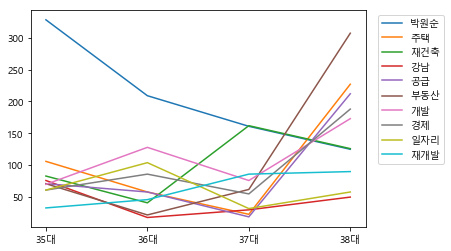

In [10]:
# s_mayor_final 행의 갯수를 통해 for문에 들어갈 범위 구하기
word_range = int(len(s_mayor_final))
# 범례 선정을 위한 각 키워드 추출(박원순, 주택, 재건축, 강남, 공급, 부동산, 개발, 경제, 일자리, 재개발)
word = s_mayor_final.iloc[:, 0]

# 그래프 생성
for i in range(word_range):
    x = [35,36,37,38]
    y = s_mayor_final.iloc[i, 1:5] # 한 행의 데이터(35대~38대)를 y에 저장
    list(y) # 그래프 생성을 위해 list형태로 변환
    
    plt.plot(x,y)
    
# x축 이름 변경
plt.xticks([35,36,37,38],['35대', '36대', '37대', '38대'])
    
# 범례생성 및 그래프 밖으로 이동
plt.legend(word, bbox_to_anchor=(1.25, 1))

# plt.show()
plt.savefig('rank_result_set.png', bbox_inches = 'tight')


## 각 키워드별 빈도수 변화(총 10개의 단어 그래프)

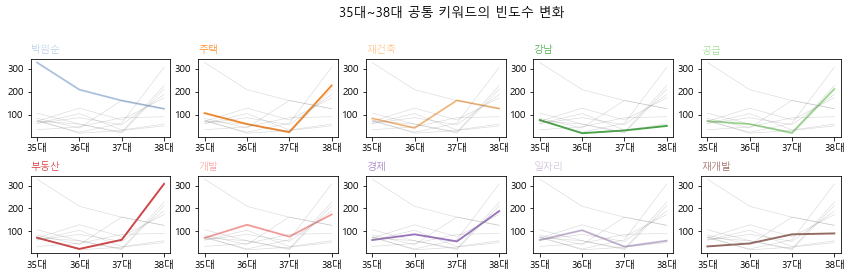

In [11]:
# 그래프 추가시 사용할 함수
def word_name(i): # 각 그래프 이름
    return str(word[i])
def word_val(i): # 각 그래프 값
    val = list(s_mayor_final.iloc[i, 1:5])
    return val

# 그래프별 색상 설정을 위한 color map 지정
palette = plt.get_cmap('tab20')

# 그래프 생성을 위한 새로운 df 생성. for문을 사용하여 그래프에 넣을 값 추가(DataFrame 한 column당 한 그래프)
df = pd.DataFrame({'x': range(35,39)}) 
for i in range(word_range):
    df[word_name(i)] = word_val(i)

# 그래프 생성
num=0
# x column을 제외한 나머지 column을 for문과 drop을 이용하여 추출
# 한 column을 추출할 때마다 그래프 생성하며 x축을 제외한 나머지 column들의 그래프가 생성된다.
for column in df.drop('x', axis=1):
    num+=1
    
    # multiple line plot (2행 5열 중 num=>그래프를 그릴 위치)
    plt.subplot(2,5, num)
    
    # 그래프 생성 및 속성 추가(컬러, 각 그래프 제목 등)
    # color : 그래프 색상, linewidth : 선 굵기, alpha : 투명도
    plt.plot(df['x'], df[column], color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    plt.title(column, loc='left', fontsize=10, fontweight=0, color=palette(num) )
    
    # 그래프간 간격 조정
    plt.subplots_adjust(top=0.8, right=2, hspace=0.5)
    
    # 강조선 제외한 나머지 라인 흑백표시
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], color='grey', linewidth=0.6, alpha=0.3)
    
    # X축 이름 변경
    plt.xticks([35,36,37,38],['35대', '36대', '37대', '38대'])

# 그래프 제목 지정
plt.suptitle("35대~38대 공통 키워드의 빈도수 변화", fontsize=13, color='black', x=1.1)
# plt.show()

# 그래프이미지 파일 저장 ( bbox_inches 옵션을 사용하여 이미지 크롭 방지 )
plt.savefig('rank_result.png', bbox_inches = 'tight')

In [12]:
# # 한 개의 그래프 샘플
# plt.plot(x,y)
# plt.xticks([35,36,37,38])
# plt.legend(['박원순'])
# plt.show()

## 막대그래프를 통한 35대-38대 키워드 빈도수 변화 비교

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from matplotlib import font_manager, rc
%matplotlib inline 
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

In [14]:
# 시각화에 쓰일 'graph10.xlsx'파일 읽어오기
# pd.pivot_table 사용해서 '단어'열을 index로 가지는 데이터프레임 만들기
# 필요없는 '변화율(%)' 열 삭제하기

graph = pd.read_excel('graph10.xlsx', encoding='utf-8').pivot_table(index='단어')
del graph['변화율(%)']
graph.head()

,35대 빈도수,38대 빈도수
단어,,
개발,85,173
경제,75,188
내곡동,27,63
민주당,86,633
부동산,73,307


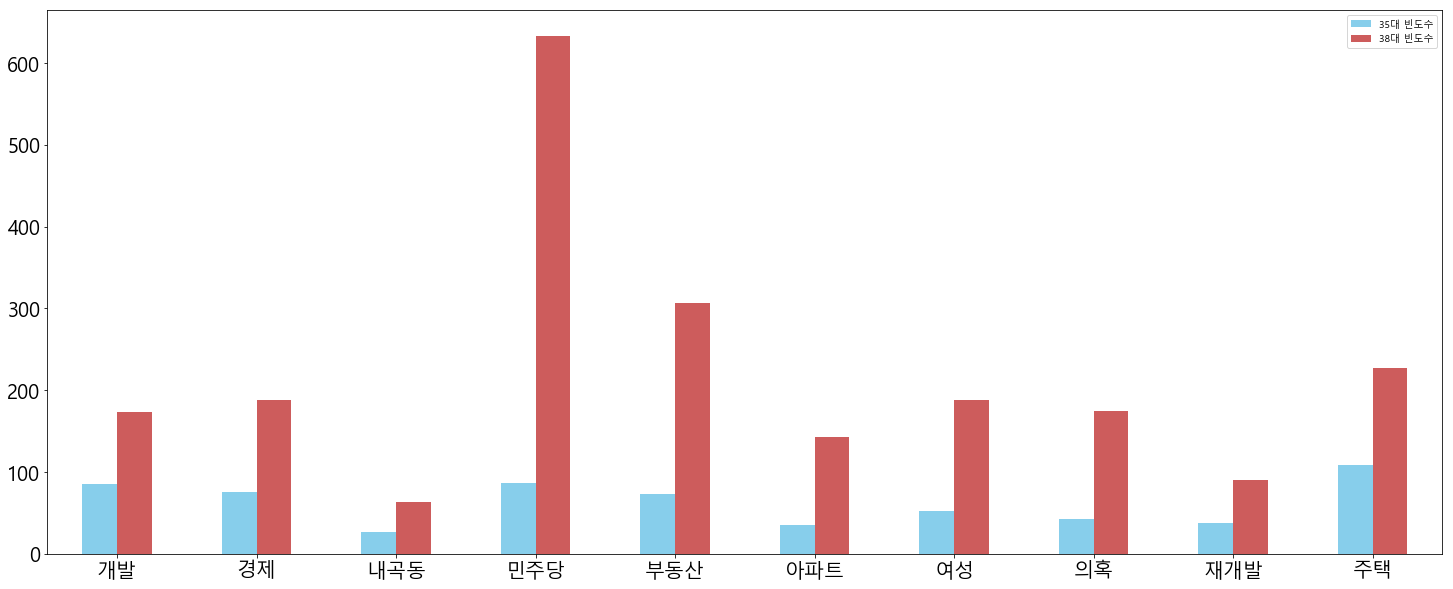

In [15]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  # 폰트 지정
rc('font', family=font_name) # 한글 표현하기 위한 함수
bar_graph = graph.plot.bar(color=["SkyBlue","IndianRed"], rot=0, figsize=(25, 10)) # 막대의 색, 그래프의 크기 등 설정

plt.xticks(fontsize=20) # x축 위치 표시 지점의 크기 설정
plt.yticks(fontsize=20) # y축 위치 표시 지점의 크기 설정
plt.rc('legend', fontsize=20) # 범례 크기 설정
plt.xlabel('') # x축 label 없애기

plt.show() # 그래프 나타내기

bar_graph.get_figure().savefig("bar_graph.png") # 그래프 저장하기

## heatmap을 이용한 35대-38대 키워드 빈도수 비교 및 변화율 확인

In [16]:
import numpy as np
import pandas as pd

In [17]:
# 35Word100 파일 읽어오기
# 35대 빈도수 상위 100개 파일
word_35 = pd.read_excel('35Word100.xlsx', encoding='utf-8')

word_35['단어'] = word_35[0]
word_35['35대 빈도수'] = word_35[1]

del word_35['Unnamed: 0']
del word_35[0]
del word_35[1]


# 38Word100 파일 읽어오기
# 38대 빈도수 상위 100개 파일
word_38 = pd.read_excel('38Word100.xlsx', encoding='utf-8')

word_38['단어'] = word_38[0]
word_38['38대 빈도수'] = word_38[1]

del word_38['Unnamed: 0']
del word_38[0]
del word_38[1]
word_38.head()


,단어,38대 빈도수
0,민주당,633
1,박영선,546
2,오세훈,451
3,부동산,307
4,안철수,262


In [18]:
# 교집합 생성(inner join)
merge_word = pd.merge(word_35, word_38, left_on='단어', right_on='단어')
merge_word.head()

,단어,35대 빈도수,38대 빈도수
0,박원순,311,125
1,주택,108,227
2,민주당,86,633
3,재건축,85,126
4,개발,85,173


In [19]:
# 변화율 구하기
merge_word_percent =((merge_word['38대 빈도수'] - merge_word['35대 빈도수']) / merge_word['35대 빈도수']) * 100
merge_word_percent = round(merge_word_percent) # 소수점 반올림(round)
merge_word['변화율(%)'] = merge_word_percent
merge_word.head()

,단어,35대 빈도수,38대 빈도수,변화율(%)
0,박원순,311,125,-60.0
1,주택,108,227,110.0
2,민주당,86,633,636.0
3,재건축,85,126,48.0
4,개발,85,173,104.0


In [20]:
# '단어'를 index로 가지는 데이터프레임 만들기
pivot_word = pd.pivot_table(merge_word, index='단어')
# '변화율(%)' 기준으로 정렬
pivot_word = pivot_word.sort_values(by='변화율(%)', ascending=False)
# 불용어 처리
pivot_word = pivot_word.drop(['전환','공급','결정', '국가'])
pivot_word.head()

,35대 빈도수,38대 빈도수,변화율(%)
단어,,,
민주당,86,633,636.0
부동산,73,307,321.0
아파트,35,143,309.0
의혹,43,175,307.0
여성,52,188,262.0


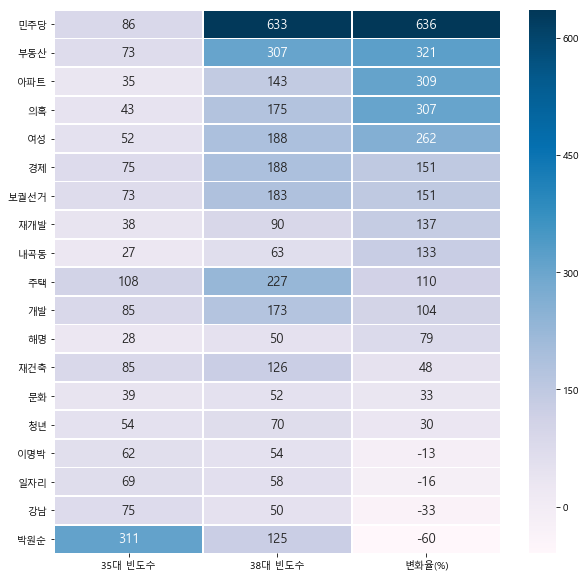

In [21]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline 

# 한글 폰트 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family= font_name)

# heatmap 생성
plt.figure(figsize=(10, 10))
image = sns.heatmap(pivot_word, annot=True, annot_kws={"size": 13}, fmt='.0f', linewidths=0.8, cmap='PuBu')
plt.ylabel('')

# 저장하기
image.get_figure().savefig("heatmap.png")

## 꺾은선그래프+막대그래프 혼합형 ( 35대-38대 빈도수와 변화율 )

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# 한글깨짐현상 처리
import matplotlib.font_manager as fm
font_location = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname = font_location).get_name()
plt.rc('font',family = font_name)

In [2]:
# 역대 시장 단어 빈도수 파일 불러오기
mayor_keyword= pd.read_excel('mayor_keyword.xlsx', encoding='utf-8')

In [3]:
# 35대->38대 단어의 빈도수 변화율 구하기
mayor_keyword['변화율'] = (mayor_keyword['38대']-mayor_keyword['35대'])/mayor_keyword['35대']*100
mayor_keyword

,word,35대,36대,37대,38대,변화율
0,박원순,328,209,161,125,-61.890244
1,주택,106,58,23,227,114.150943
2,재건축,83,41,162,126,51.807229
3,강남,76,18,30,50,-34.210526
4,공급,71,58,19,212,198.591549
5,부동산,71,22,62,307,332.394366
6,개발,70,128,76,173,147.142857
7,경제,61,86,55,188,208.196721
8,일자리,61,104,32,58,-4.918033
9,재개발,33,46,86,90,172.727273


In [4]:
# 변화율 그래프를 그리기 위해 copy()를 사용하여 같은 그래프 복사
var_keyword = mayor_keyword.copy()
# word,변화율 열만 추출하여 저장
var_keyword = var_keyword[['word','변화율']]
var_keyword

,word,변화율
0,박원순,-61.890244
1,주택,114.150943
2,재건축,51.807229
3,강남,-34.210526
4,공급,198.591549
5,부동산,332.394366
6,개발,147.142857
7,경제,208.196721
8,일자리,-4.918033
9,재개발,172.727273


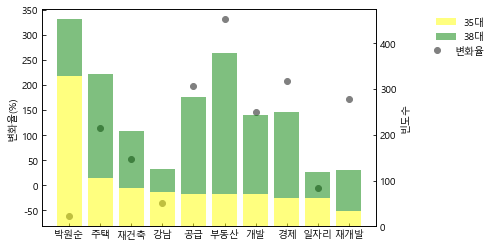

In [5]:
# for문 돌릴 범위 지정- word_range
# x축 값이 될 단어 목록 추출- word
word_range = int(len(mayor_keyword))
word = mayor_keyword.iloc[:, 0]
# 그래프를 그릴 값 저장하는 빈 리스트 생성
x_val = []
y_rate_val = []
y_35_val = []
y_38_val = []

for i in range(word_range):
    # 단어목록 list 저장
    x = word[i]
    x_val += [x]
    
    # 변화율 list 저장
    y_rate = var_keyword.iloc[i, 1]
    y_rate_val += [y_rate]
    
    # 35대 빈도수 list 저장
    y_35 = mayor_keyword.iloc[i, 1]
    y_35_val += [y_35]
    # 38대 빈도수 list 저장
    y_38 = mayor_keyword.iloc[i, 4]
    y_38_val += [y_38]

# 그래프 생성
fig, line_comp =  plt.subplots()

# 변화율 그래프 생성 (꺾은선 그래프->marker로만 체크)
line_comp.plot(x_val, y_rate_val, color='grey', marker='o', linestyle='', label='변화율')
line_comp.tick_params(axis='both', direction='in')
line_comp.set_ylabel('변화율(%)')

# 빈도수 그래프 생성(막대그래프 2개)
bar_comp = line_comp.twinx() # x축 공유
bar_comp.bar(x_val, y_35_val, alpha=0.5, color='yellow', label='35대') # 35대(노란색막대)
# 35대 막대와 38대 막대가 겹쳐 가려지는것을 방지하기위해 bottom에 35대 그래프를 그리고 그 위로 38대 그래프를 올림
bar_comp.bar(x_val, y_38_val, alpha=0.5, color='green', bottom=y_35_val, label='38대') # 38대(초록색막대)
bar_comp.tick_params(axis='y', direction='in')
bar_comp.set_ylabel('빈도수')

# 범례 속성 지정 (그래프 밖으로 이동 및 테두리 삭제)
bar_comp.legend(bbox_to_anchor=(1.35, 1), frameon=False, fontsize=10)
line_comp.legend(bbox_to_anchor=(1.35, 0.87), frameon=False, fontsize=10)

# y축 -표시 나타내기
plt.rcParams['axes.unicode_minus'] = False

# 그래프 이미지 저장
plt.savefig('line+bar_graph.png', bbox_inches = 'tight')